# Ratings Data
The data includes information on ratings of tweets posted on community notes. The information contained includes the helpfulness level of a tweet. It also provides information on the reasons why certain tweets were helpful or the reasons why they were not helpful. We are analyzing what type of features make certain tweets helpful and the features that make tweets unhelpful.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/ratings.csv')
print(df)

                    noteId                                 raterParticipantId  \
0      1634690324999143427  1C0972F584F1BD912FB957D99A854609C93213D0A9C361...   
1      1634805166510600192  1C0972F584F1BD912FB957D99A854609C93213D0A9C361...   
2      1650963648356155394  1C0972F584F1BD912FB957D99A854609C93213D0A9C361...   
3      1654051506910314498  1C0972F584F1BD912FB957D99A854609C93213D0A9C361...   
4      1654060326118146049  1C0972F584F1BD912FB957D99A854609C93213D0A9C361...   
...                    ...                                                ...   
99995  1734986555779891525  4CE89A5C9F77E8BE56272A99637341381E410033379877...   
99996  1734997470478786741  4CE89A5C9F77E8BE56272A99637341381E410033379877...   
99997  1735023558336577544  4CE89A5C9F77E8BE56272A99637341381E410033379877...   
99998  1735062011145240594  4CE89A5C9F77E8BE56272A99637341381E410033379877...   
99999  1735103201068589407  4CE89A5C9F77E8BE56272A99637341381E410033379877...   

       createdAtMillis  ver

## Percent of Unique Tweets
In our dataset, we found that 73.897% of all tweets that were rated were unique tweets. This provides us with a diverse dataset where we have access to a lot of different tweets rather than the same tweets being rated repeatedly.

In [5]:
distinct_notes = df['noteId'].nunique()
distinct_note_percent = distinct_notes / df.shape[0] * 100
print(str(distinct_note_percent) + '%')

73.897%


## Ratings of Tweets
We are analyzing the number of tweets in our dataset that was rated as being helpful, somewhat helpful, or unhelpful. The following graph shows the total number of tweets that recieved each rating. We see that about 63% of tweets were rated as being helpful, 5% as somewhat helpful, and 32% as not helpful.

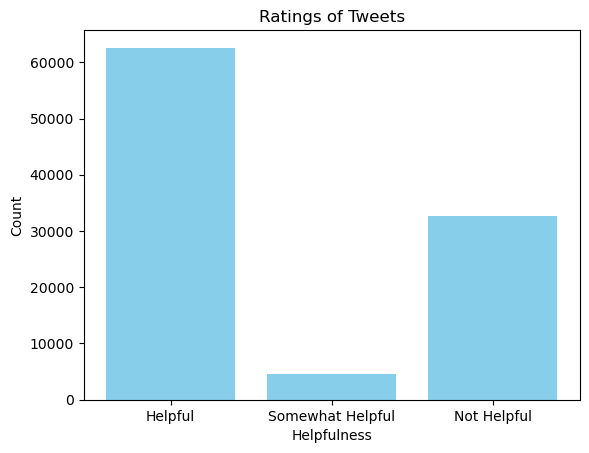

In [6]:
count_helpful = (df['helpfulnessLevel'] == 'HELPFUL').sum()
count_somewhat = (df['helpfulnessLevel'] == 'SOMEWHAT_HELPFUL').sum()
count_nothelpful = (df['helpfulnessLevel'] == 'NOT_HELPFUL').sum()

categories = ['Helpful', 'Somewhat Helpful', 'Not Helpful']
values = [count_helpful, count_somewhat, count_nothelpful]
plt.bar(categories, values, color='skyblue')
plt.xlabel('Helpfulness')
plt.ylabel('Count')
plt.title('Ratings of Tweets')
plt.show()

## Reasons of Helpfulness
We are analyzing the reasons why tweets were rated as being helpful. The following pie chart shows the reasons why tweets were rated as helpful broken down by percentage. We see that the 4 main reasons why tweets were rated as being helpful was due to good context, being clear, addressing the claim, and having good sources.

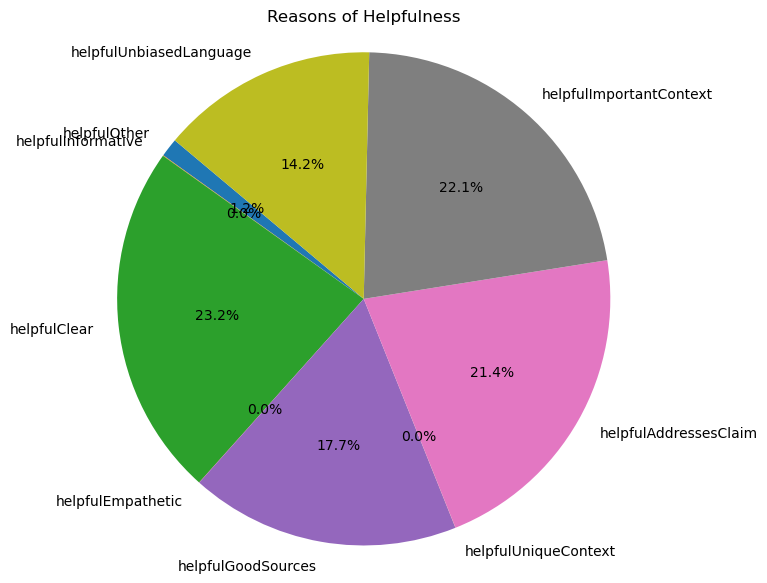

In [4]:
helpful_reasons_count = []
helpful_reasons_names = []
for i in range(9, 18):
    helpful_reasons_count.append(df.iloc[:, i].sum())
    helpful_reasons_names.append(df.columns[i])

plt.figure(figsize=(7, 7))
plt.pie(helpful_reasons_count, labels=helpful_reasons_names, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Reasons of Helpfulness')
plt.show()

## Reasons for Unhelpfulness
We are analyzing the reasons why tweets were rated as being unhelpful. The following pie chart shows the reasons why tweets were rated as unhelpful broken down by percentage. We see that the 5 main reasons why tweets were rated as being unhelpful was due to note not needed, opinion speculation, missing key points, sources missing or unreliable, and argumentative or biased.

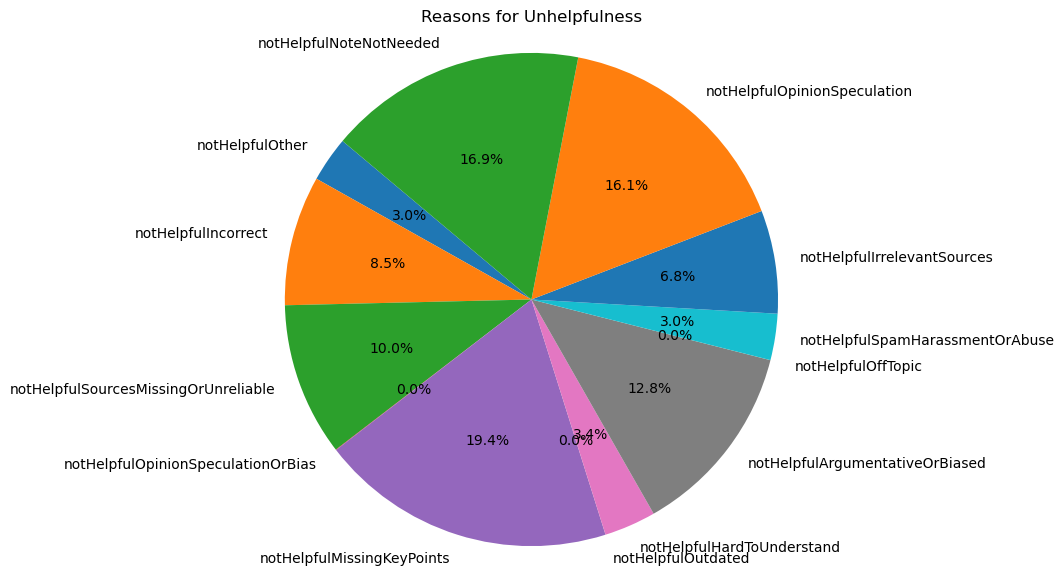

In [8]:
unhelpful_reasons_count = []
unhelpful_reasons_names = []
for i in range(18, 31):
    unhelpful_reasons_count.append(df.iloc[:, i].sum())
    unhelpful_reasons_names.append(df.columns[i])

plt.figure(figsize=(7, 7))
plt.pie(unhelpful_reasons_count, labels=unhelpful_reasons_names, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Reasons for Unhelpfulness')
plt.show()

## Limitations
Some limitations for the ratings dataset is that the ratings of tweets and reasons for helpfulness or unhelpfulness are all recorded as categories. They are categorical names rather than numerical numbers. This can be hard for us to train our machine learning model because we can't graph regression models based on categories. We will need to find a way to convert our data from categories into numbers. One possible solution as next steps is to convert ratings into booleans. For example, if a tweet is marked as helpful it gets assigned 1. If it's somewhat helpful, it gets assigned a 0.5. If it is unhelpful, it gets assigned a 0. Another possible solution is to utilzie one hot encoding to numerically categorize data by using a bit representation.

In [12]:
import numpy as np

In [68]:
# Import the dataframes
notes_df = pd.read_csv('data/notes.csv')
ratings_df = pd.read_csv('data/ratings.csv')
merged_df = pd.merge(notes_df, ratings_df, on='noteId', how='inner')

""" This function takes a dataframe and one hot encodes the helpfulness of a note into a binary format.
    Each helpfulness rating is converted into a vector of zeros, with exception of i^th element which is 1. 
    The i^th element represents the category the true value is in.

    Args:
        df: A pandas dataframe containing the data

    Returns:
        np.ndarray (n, num_classes): One-hot representation of the helpfulness level.
"""
def one_hot(df) -> np.ndarray:
    one_hot_encoded = np.zeros((len(df), 3))
    for i in range(len(df)):
        helpfulness = df.iloc[i]['helpfulnessLevel']
        if helpfulness == 'HELPFUL':
            one_hot_encoded[i][0] = 1
        elif helpfulness == 'SOMEWHAT_HELPFUL':
            one_hot_encoded[i][1] = 1
        else:
            one_hot_encoded[i][2] = 1

    return one_hot_encoded

""" This function takes a x matrix of features and a y matrix of one hot encoded values and finds the optimal weight.
    It also takes a lambda value that is used for regularlization.

    Args:
        x (np.ndarray): The matrix of features
        y (np.ndarray): The matrix of one hot encoded values
        _lambda (float): The regularlization parameter

    Returns:
        np.ndarray (n, ): A vector of predicted weights
"""
def train_model(x: np.ndarray, y: np.ndarray, _lambda: float) -> np.ndarray:
    return np.linalg.solve(x.T @ x + _lambda * np.eye(len(x.T)), x.T @ y)

""" This function takes a x matrix of features and a w vector of weights to predict the helpfulness of a note.

    Args:
        x (np.ndarray): The matrix of features
        w (np.ndarray): A vector of weights

    Returns:
        np.ndarray (n, ): A matrix of predicted helpfulness
"""
def predict(x: np.ndarray, w: np.ndarray) -> np.ndarray:
    arr = np.zeros(len(x))
    predict = x @ w
    for i in range(len(predict)):
        arr[i] = np.argmax(predict[i])

    return arr

# Extract training set and testing set
train = merged_df.iloc[:10500, :]
test = merged_df.iloc[10501:, :]
extract_train = train.iloc[:, 31 : 53]
extract_test = test.iloc[:, 31 : 53]

# Convert training set and testing set into np arrays
x_train = extract_train.values
y_train = one_hot(train)
x_test = extract_test.values
y_test = one_hot(test)

# Predict weights and train model
_lambda = 0.01
w_hat = train_model(x_train, y_train, _lambda)

# Predict outputs using trained model
y_train_pred = predict(x_train, w_hat)
y_test_pred = predict(x_test, w_hat)

# Find true helpfulness levels for training data
y_train_true = []
for j in range(len(y_train)):
    y_train_true.append(np.argmax(y_train[j]))

# Find true helpfulness levels for testing data
y_test_true = []
for p in range(len(y_test)):
    y_test_true.append(np.argmax(y_test[p]))

# Find number of mismatch for train data
count = 0
for k in range(len(y_train_true)):
    if y_train_true[k] != y_train_pred[k]:
        count += 1

number_train = (count / len(y_train_true)) * 100
error_percent_train = round(number_train, 2)
print('Train Error: ' + str(error_percent_train) + '%')

# Find number of mismatch for test data
count1 = 0
for l in range(len(y_test_true)):
    if y_test_true[l] != y_test_pred[l]:
        count1 += 1

number_test = (count1 / len(y_test_true)) * 100
error_percent_test = round(number_test, 2)
print()
print('Test Error: ' + str(error_percent_test) + '%')

print()
print('Weights:')
print(w_hat)


Train Error: 6.54%

Test Error: 6.78%

Weights:
[[ 6.87789081e-02  3.12004139e-02 -1.40597066e-02]
 [-2.72188140e-01 -2.80419469e-03  8.70597493e-01]
 [ 3.79996262e-01 -1.19305931e-03 -1.44797529e-04]
 [-1.03244728e-01 -5.36199744e-03  2.53117212e-01]
 [ 1.33364236e-01  9.62138405e-03 -4.40629886e-04]
 [-1.04382731e-01 -3.02801953e-03  2.22301773e-01]
 [ 3.17688062e-01  8.24079164e-03 -2.64595151e-03]
 [ 3.57813892e-01  4.86969358e-02 -1.33567600e-02]
 [-8.62707413e-02 -3.94353227e-02  6.75274723e-03]
 [-2.19647840e-02  9.56997182e-02  2.81053094e-01]
 [ 3.42413986e-02 -7.84848724e-02  2.10012870e-01]
 [-3.40529313e-02  6.14218569e-02  2.91838051e-01]
 [ 1.36814569e-02 -2.89674086e-02  8.12967142e-01]
 [-2.08097108e-02  5.47374514e-02  4.48163711e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-6.92442506e-02  1.43460636e-01 -1.89362667e-01]
 [-2.25176577e-02  3.73898264e-02  1.34418451e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.96862426e-02 -1.08627588e-01 